# SVM et Sélection d'attribut



## Variables d'environement

Pensez à vérifier les variables d'environement:

In [1]:
import sys

print(sys.version)
print(sys.path)

3.5.2 (default, Nov 23 2017, 16:37:01) 
[GCC 5.4.0 20160609]
['', '/usr/lib/python35.zip', '/usr/lib/python3.5', '/usr/lib/python3.5/plat-x86_64-linux-gnu', '/usr/lib/python3.5/lib-dynload', '/usr/local/lib/python3.5/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.5/dist-packages/IPython/extensions', '/home/ethiy/.ipython']


## Séparation linéaire

Le but de cette partie est de comparer le SVM linéaire à un autre exemple de classifieur linéaire: le Perceptron. On commence d'abords par rappeler rapidement le principe du Perceptron.

### Perceptron

L'algorithm du Perceptron date des [travaux de Frank Rosenblatt](http://psycnet.apa.org/record/1959-09865-001). Le but était de modéliser l'action des neurones. Ce modèle va être ensuite utilisé pour contruire des réseaux de neurones complexes et c'est la base de toute les méthodes de Deep Learning. Le modèle donne pour chaque attribut $i \in \{1,2, \dots,d\}$ de la donnée d'entrée $x = \begin{pmatrix}x_1\\ x_2\\ \vdots \\x_d\end{pmatrix}$ un poids $w_i$. Pour chaque entrée $x$ on lui applique linéairement un vecteur de poids $w = \begin{pmatrix}w_1\\ w_2\\ \vdots \\w_d\end{pmatrix}$ pour lui attribuer un score $s = \langle w \vert x\rangle = \sum_{i=1,\dots,d}w_i.x_i$. Suite à ce score obtenu, on prends une décision:
* si $s < c \in \mathbb{R}$, on choisit la classe $0$;
* si $s \geq c $, on choisit la classe $1$

On peut écrire donc ce classifieur autrement:

$$f_{perceptron}(x) \triangleq \mathbb{1}_{\langle w \vert x\rangle + b \geq 0}$$

où $b = -c$ et $\mathbb{1}_A(x) = \begin{cases}1 & , x \in A\\0 & , x \notin A\end{cases}$.

Si on cherche à rammener les classes à la convention SVM (i.e. $y=\pm1$), avec une simple transformation affine, on a:
$$D_{perceptron}(x) \triangleq 2.\mathbb{1}_{\langle w \vert x \rangle + b \geq 0} - 1 = sign(\langle w \vert x \rangle + b \geq 0)$$

### Régression logistique

Le modèle de régression logistique est proche des méthodes génératives. Ce Modèle permet juste de donner une relation entre les probabilités par classe et non pas les distributions en elle même:
$$ \ln \Big( \frac{p(x \vert y=1)}{p(x \vert y=0)}\Big) = \langle w \vert x \rangle + b$$

1. 
    a. En appliquant la règle de Bayes, montrer que: $$\ln\Big(\frac  {p(y=1\vert x)}{1-p(y=1\vert x)}\Big) = \ln\Big(\frac{p(y=1)}{p(y=0)}\Big) + b +\langle w \vert x \rangle$$
    b. Montrer donc que le décideur de la régression logistique est:
$$f_{logistic} = \sigma(\tilde b +\langle w \vert x \rangle)$$
où: $\sigma(t) \triangleq \frac{1}{1 + e^{-t}} \quad ,\forall t \in \mathbb{R}$

2. Ecrire un code python qui trace les deux fonctions, avec de multiple valeurs de $\lambda$, $t \mapsto \sigma(\lambda.t)$ et $t \mapsto \mathbb{1}_{t \geq 0}$, dans une même figure. A la lumière de la figure obtenue, discuter les deux fonctions de décisions.

**ERRATUM:** Dans la question 2, c'était: $$f_{logistic} = \sigma(\tilde b +\langle w \vert x \rangle)$$ et non pas: $$D_{logistic} = \sigma(\tilde b +\langle w \vert x \rangle)$$

#### Réponse

On rappelle que dans le cas où $y \in \{0, 1\}$:

$$f(x) = \mathbb{E}(Y \vert X=x) = 0 \times p(y=0 \vert x) + 1 \times p(y=1 \vert x) = p(y=1 \vert x)$$

Dans le cadre de la modélisation SVM, on a vu dans le cours le cas $\tilde{y} \triangleq 2\times y - 1 \in \{-1, 1\}$. On cherchait à apprendre donc:

$$\tilde{f}(x) = p(y=1 \vert x) - p(y=-1 \vert x)$$

Selon les valeurs que $f$ (resp. $\tilde{f}$) prend au point de test $x$, on décide si $y = 0$ ou $y = 1$ (resp. $y = -1$ ou $y = 1$). Mathématiquement, la fonction qui décide, pour chaque $x$, le bon $y$ est nomée fonction *de décision*:

$$y = D(x) = \mathbb{1}_{f(x) \geq \frac{1}{2}} \quad \Big(resp. \tilde{y} = \tilde{D}(x) = sign(\tilde{f(x)})\Big)$$

1. a. Sachant que $p(y=0 \vert x) + p(y=1 \vert x) = 1$ , On peut dire que: $$\frac{p(y=1 \vert x)}{1 - p(y=1 \vert x)} = \frac{p(y=1 \vert x)}{p(y= 0 \vert x)}$$ La règle de bayes implique que: $$p(y=i \vert x) = \frac{p(x\vert y=i).p(y=i)}{p(x)} \quad \forall i = 0, 1$$ et donc: $$\frac{p(y=1 \vert x)}{1 - p(y=1 \vert x)} = \frac{p(x \vert y=1)}{p(x \vert y=0)} . \frac{p(y=1)}{p(y=0)}$$ $$ \ln\Big( \frac{p(y=1 \vert x)}{1 - p(y=1 \vert x)} \Big) =  \ln\Big( \frac{p(x \vert y=1)}{p(x \vert y=0)} \Big) + \ln\Big( \frac{p(y=1)}{p(y=0)} \Big) = \langle w \vert x\rangle + b + \ln\Big( \frac{p(y=1)}{p(y=0)}\Big)$$

   b. On pose: $\tilde{b} = b + \ln\Big( \frac{p(y=1)}{p(y=0)}\Big)$ et $q = p(x \vert y=1) = f_{logistic}(x)$. L'équation précédente devient: $$\ln\Big( \frac{q}{1 - q} \Big) = \tilde{b} + \langle w \vert x\rangle \Leftrightarrow\frac{q}{1 - q} = e^{\tilde{b} + \langle w \vert x\rangle}$$ $$ \Leftrightarrow q = e^{\tilde{b} + \langle w \vert x\rangle} - q. e^{\tilde{b} + \langle w \vert x\rangle}$$ $$\Leftrightarrow q + q. e^{\tilde{b} + \langle w \vert x\rangle} = e^{\tilde{b} + \langle w \vert x\rangle}$$ $$\Leftrightarrow q.(1 + e^{\tilde{b} + \langle w \vert x\rangle}) = e^{\tilde{b} + \langle w \vert x\rangle} $$ $$\Leftrightarrow f_{logistic}(x) = q = \frac{e^{\tilde{b} + \langle w \vert x\rangle}}{1 + e^{\tilde{b} + \langle w \vert x\rangle}} $$

2. Au fur et à mesure que le facteur d'échelle $\lambda$ grandit $t \mapsto \sigma(\lambda.t)$ converge vers la fonction Heavyside. La régression logistique peut donc être vu comme une relaxation du Perceptron. En réseaux de neurones, ces fonctions s'appellent des [fonctions d'activations](https://fr.wikipedia.org/wiki/Fonction_d%27activation). l'intérêt de la sigmoid $\sigma()$ est qu'elle approche la Heavyside en plus d'être dérivable. Cela aide au moment de la résolution du problème d'optimisation qui cherche les droites de séparation optimale.

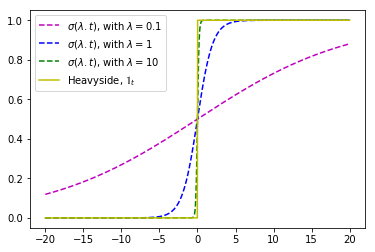

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-20, 20, 1000)

lambdas = [.1, 1, 10]
colors = ['k', 'b', 'r']

for l, c in zip(lambdas, ['m', 'b', 'g']):
    plt.plot(x, 1/(1 + np.exp(-l*x)), '--', color=c, label='$\sigma(\lambda.t)$, with $\lambda = {}$'.format(l))

plt.plot(x, x>0, 'y-', label='Heavyside, $\mathbb{1}_t$')

plt.legend()
plt.show()

### Comparaison

On rappelle ici que le SVM linéaire a pour but de maximiser la marge entre deux classes, contrairement au Perceptron et à la régression logistique. Les problèmes à optimiser ne se ressemble plus.

Le but du code, ci-dessous, est d'illustrer cette différence.

1. a. Qu'est ce que fait ce bout de code?

   b. Commentez le résultat du programme suivant.

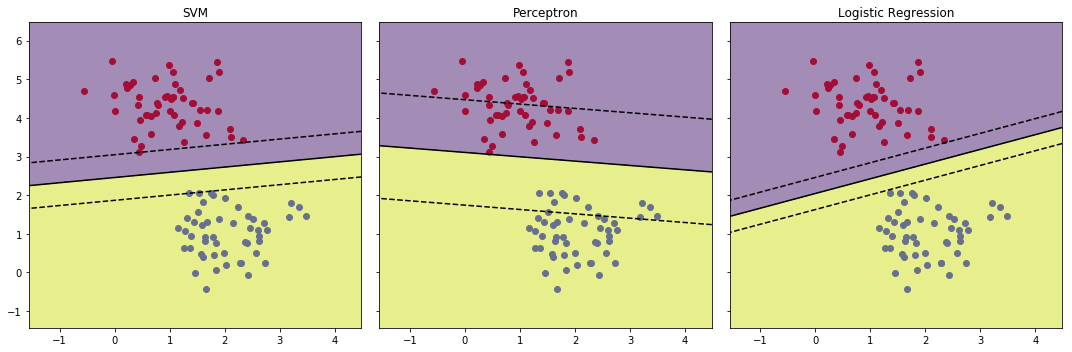

In [3]:
import sklearn.datasets
import sklearn.linear_model


def plot_points(points, ax, color):
    ax.scatter(points[:, 0], points[:, 1], c=color)
    

def plot_dataset(X, Y, ax, colors=['r', 'b']):
    for x, col in zip([X[Y==0], X[Y==1]], colors):
        plot_points(x, ax, col)
        

def mesh_from(instances, gap=.2):
    return np.meshgrid(
        np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, gap),
        np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, gap),
    )


def plot_contours(xx, yy, ax, classifier, **parameters):
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, **parameters)


def plot_margin(xx, yy, ax, classifier, **parameters):
    Z = np.empty(xx.shape)
    for (i, j), value in np.ndenumerate(xx):
        Z[i, j] = classifier.decision_function([[value, yy[i, j]]])[0]
    ax.contour(xx, yy, Z, [-1.0, 0.0, 1.0], colors='k', linestyles=['dashed', 'solid', 'dashed'])


X, Y = sklearn.datasets.make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.60)
xx, yy = mesh_from(X, .01)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
f.set_figheight(5)
f.set_figwidth(15)

for ax, loss , title in zip([ax1, ax2, ax3], ['hinge', 'perceptron', 'log'], ['SVM', 'Perceptron', 'Logistic Regression']):
    plot_dataset(X, Y, ax)
    model = sklearn.linear_model.SGDClassifier(alpha=0.01, max_iter=100, loss=loss).fit(X, Y)
    plot_contours(
        xx,
        yy,
        ax,
        model,
        cmap=plt.cm.viridis,
        alpha=0.5
    )
    plot_margin(
        xx,
        yy,
        ax,
        model
    )
    ax.set_title(title)

plt.tight_layout()
plt.show()

#### Réponse:

1. a. Ce code trace des points synthétiques ainsi que trois séparateurs linéaires. On étudie ici le SVM, le Perceptron et la régression logistique.

   b. Le Perceptron accepte beaucoup de solution. Selon l'initialisation et l'algorithme utilisé, il donne une solution différente. La solution trouvée ici privilègie la classe bleue. En effet, parmis les points rouges - qui sont supposés être sûrs comme les instances bleues - on trouve quelque uns qui se retrouve dans la marge, qui est censée rassembler les points non sûrs. La régression logistique permet de pallier à ce problème. Cependant, on remarque que la marge est un étroite. Le SVM, quant à lui, cherche la séparation qui garanti la plus grande marge (et donc le plus de pouvoir de généralisation) en restant fidèle au données. On considère ici que le point rouge qui dépasse reprèsente un problème de calcul numérique. On voit bien la différence entre SVM et la régression logistique. La marge obtenue grâce au SVM est, en effet, plus grande.
   

### Pénalisation vs Généralisation

1. a. Entraîner des SVM linéaire avec différentes constantes de pénalisation $C$ sur les mêmes données.

   b. Tracer la marge selon les valeurs de la constante $C$.
   
   c. Commenter les résultats.

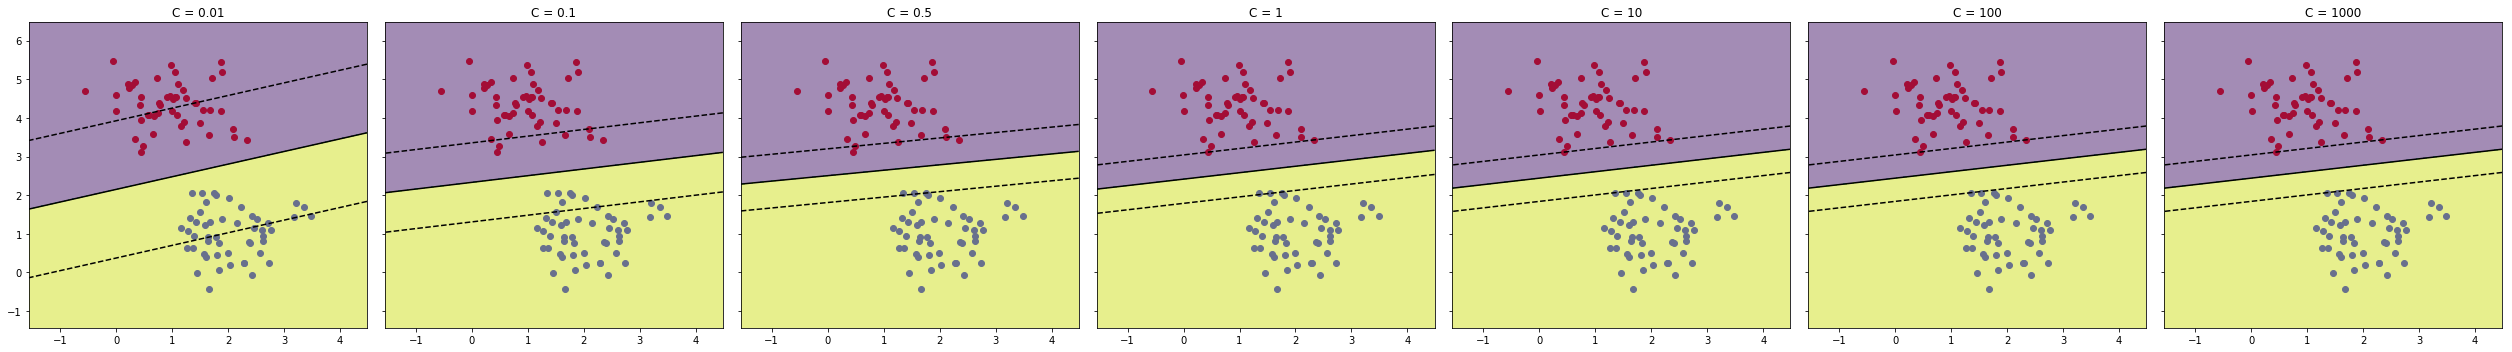

In [4]:
import sklearn.svm

Cs = [.01, .1, .5, 1, 10, 100, 1000]

f, axes = plt.subplots(1, len(Cs), sharey=True)
f.set_figheight(5)
f.set_figwidth(5 * len(Cs))

for C, ax in zip(Cs, list(axes)):
    plot_dataset(X, Y, ax)
    model = sklearn.svm.SVC(C=C, kernel='linear').fit(X, Y)
    plot_contours(
        xx,
        yy,
        ax,
        model,
        cmap=plt.cm.viridis,
        alpha=0.5
    )
    plot_margin(
        xx,
        yy,
        ax,
        model
    )
    ax.set_title('C = ' + str(C))

plt.tight_layout()
plt.show()

#### Réponse:

1. 
   c. On rappelle le problème d'optimisation du SVM:
   
   $$ \begin{aligned}
				& \min_{\textbf{w}}
				& & {\vert\vert \textbf{w} \vert\vert}^2 \\
				& \text{sous contrainte}
				& & Y^i.(\textbf{w}.\textbf{X}^i + b) \geq 1 \; \forall i = 1, \dots, n.
				\end{aligned}$$
                
    Ce problème correspond à ce que l'on appelle la marge "dure" (Hard Margin). On impose que tout les points d'entraînement soient à l'extérieur de la marge. On peut relacher ce problème en SVM avec marge souple (Soft Margin). On agrandit la marge pour avoir plus de généralisation au détriment de la certitude des points donnés. Le problème devient donc:
    $$\begin{aligned}
				& \min_{\textbf{w}, \xi_1,\dots,\xi_n \in \mathbb{R}^+}
				& & {\vert\vert \textbf{w} \vert\vert}^2 + C.\sum_{i=1,\dots,n}\xi_i\\
				& \text{sous contrainte}
				& & Y^i.(\textbf{w}.\textbf{X}^i + b) \geq 1 - \xi_i , \forall i = 1, \dots, n.
				\end{aligned}$$
   On rajoute le terme $C.\sum_{i=1,\dots,n}\xi_i$ pour pénaliser les variables ressorts qui indiquent, pour chaque point $X^i$ de la données, sa distances de la marge. Ces variables sont positives pour ne pénaliser que les instances qui sont en dehors de la marge. On peut donc voir grâce aux expériences que plus on augmente le $C$, plus la marge de rétrécit. A partir d'un seuil $C \geq 1$, la pénalisation n'impacte plus le résultat. Cela correspond, en réalité au cas où $C = \infty$ pour notre configuration. On tombe donc sur le premier problème d'optimisation. On remarquera donc que led résultats sont les mêmes que celui obtenu dans l'expérience précédente.

### Kernel SVM

1. a. Relancer le même code mais cette fois-ci avec le kernel polynomial et le kernel rbf en jouant sur le $\gamma$ sur les données suivantes.

   b. Commenter les résultats.
   

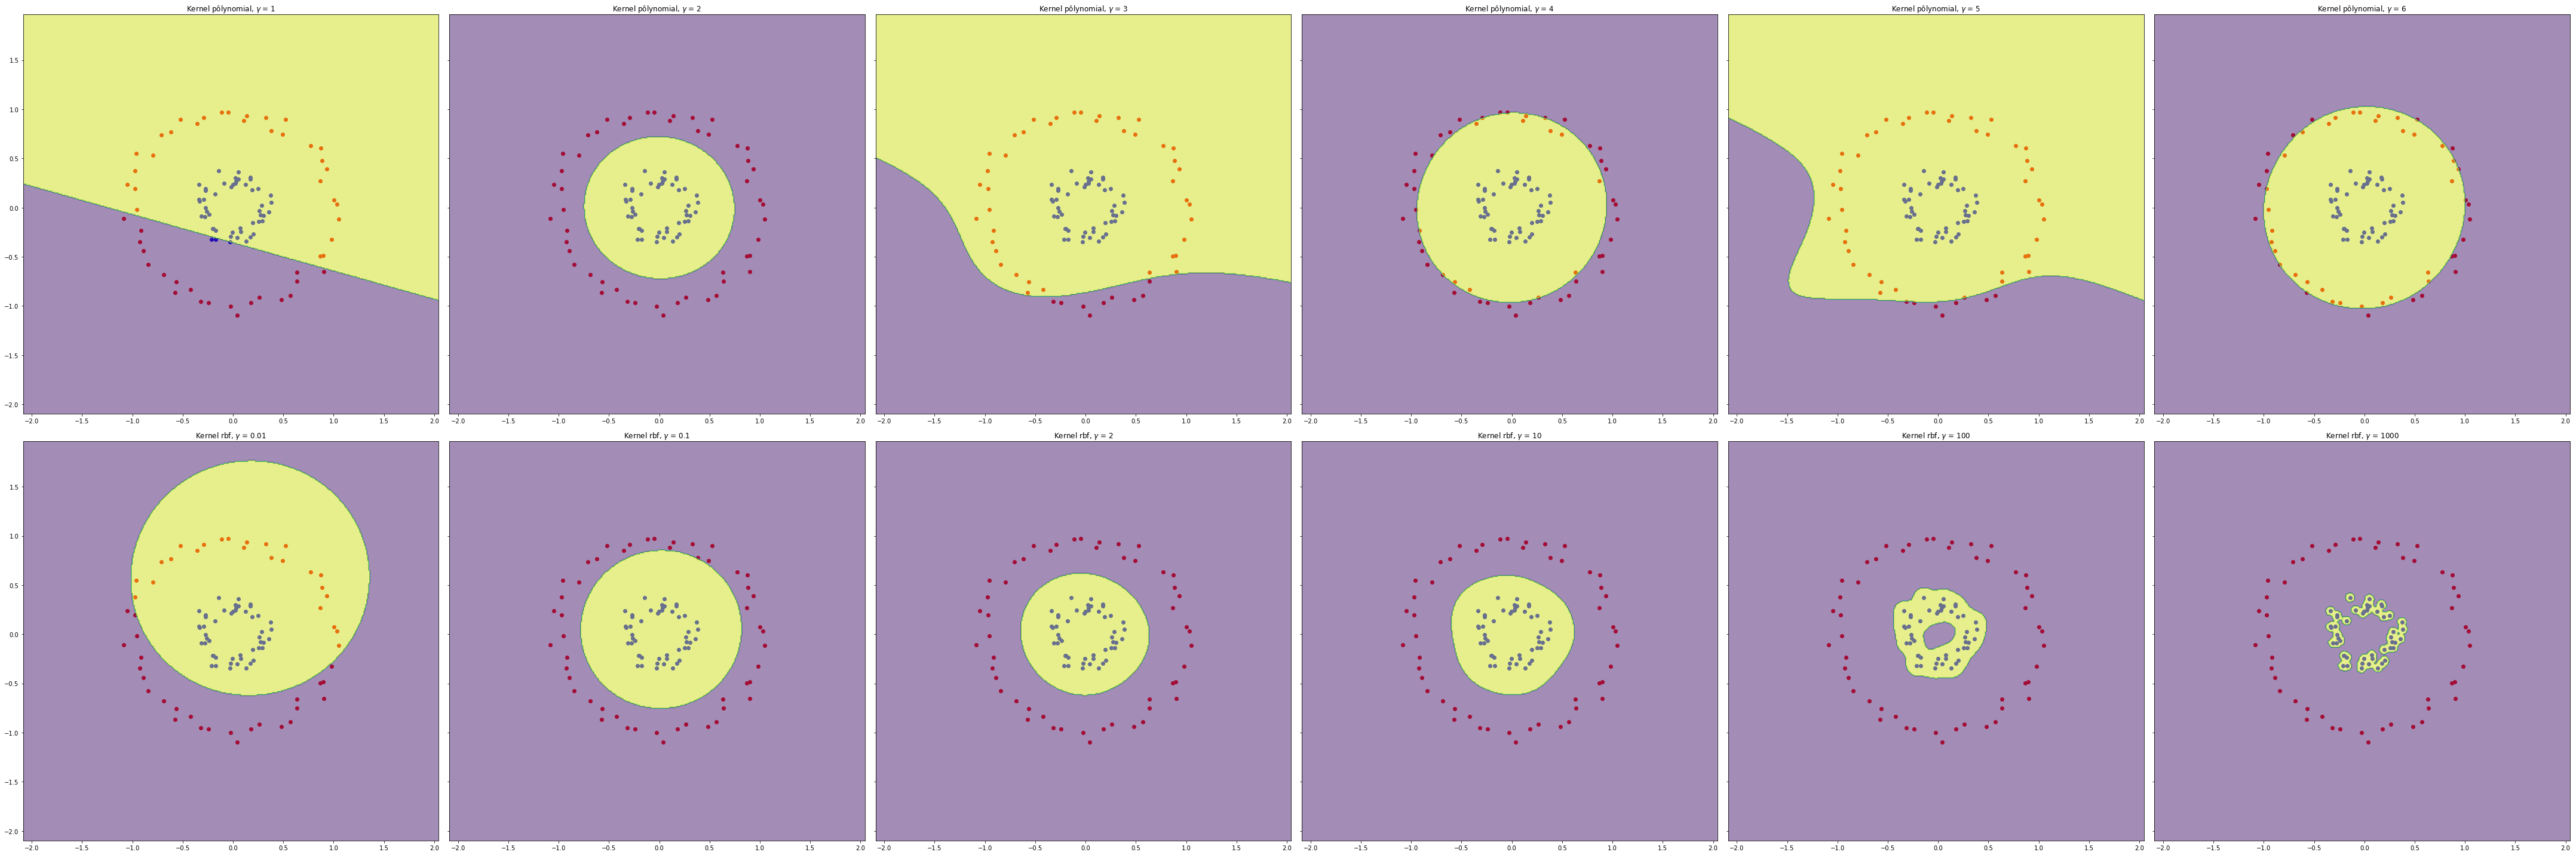

In [10]:
X, Y = sklearn.datasets.make_circles(n_samples=100, factor=.3, noise=.05)
xx, yy = mesh_from(X, .01)

gammas = [1, 2, 3, 4, 5, 6]

f, axes = plt.subplots(2, len(gammas), sharey=True)
f.set_figheight(20)
f.set_figwidth(10*len(gammas))

for gamma, ax in zip(gammas, list(axes[0, :])):
    plot_dataset(X, Y, ax)
    model = sklearn.svm.SVC(degree=gamma, kernel='poly').fit(X, Y)
    plot_contours(
        xx,
        yy,
        ax,
        model,
        cmap=plt.cm.viridis,
        alpha=0.5
    )
    ax.set_title('Kernel pôlynomial, $\gamma$ = ' + str(gamma))

gammas = [.01, .1, 2, 10, 100, 1000]
for gamma, ax in zip(gammas, list(axes[1, :])):
    plot_dataset(X, Y, ax)
    model = sklearn.svm.SVC(gamma=gamma, kernel='rbf').fit(X, Y)
    plot_contours(
        xx,
        yy,
        ax,
        model,
        cmap=plt.cm.viridis,
        alpha=0.5
    )
    ax.set_title('Kernel rbf, $\gamma$ = ' + str(gamma))

plt.tight_layout()
plt.show()

#### Réponse:

1. 
   b. Dans ce cas, les deux classes ne sont pas séparables linéairement (i.e. Kernel pôlynomial avec $\gamma = 1$). On applique donc deux types de transformation d'espace.
   * le kernel pôlynomial: On remarque ici deux comportements: le cas où le degré du polynôme est paire, et donc la transformation est symétrique, et le deuxième cas où le degré est impaire, et, en conséquence, la transformation est asymétrique. Vue la symmétrie de la donnée d'entraînement, les transformations asymétrique ne correspondent pas au problème posé. Concernant les degrés paires, le cas de $\gamma=2$ semble marcher le mieux. En effet, plus le degré est grand, plus on pénalise les grandes distances. Il faut donc adapter le degré à la distribution de la donnée: i.e. différencier entre les points rouges et bleus qui sont relativement loin, sans pénaliser non plus les distances entre les points propres à la même classe. Effectivement, à partir du degré $\gamma \geq 4$ les distances entre les points bleus qui sont diamétralement opposés sont confondues avec les points rouges les plus proches. C'est ainsi que les points bleus sont confondus, dans la même classe, avec les points rouges les plus proches.
   * le kernel rbf: On rappelle la formule de ce kernel: $$\forall x,y \in \mathbb{R}^d \quad k_{\gamma}(x,y) = e^{-\gamma.\vert\vert x-y\vert\vert^2} = e^{-\frac{\vert\vert x-y\vert\vert^2}{2.\sigma^2}} $$ avec: $$\sigma \leftarrow \frac{1}{\sqrt{2.\gamma}}$$
   On remarque donc que quand $\gamma$ augmente, $k_{\gamma}(x,y)$ devient plus faible pour la même distance $\vert\vert x-y\vert\vert^2$. On peut même remarquer que:
   $$\forall x, y \in \mathbb{R}^d \quad \sqrt{\frac{\gamma}{\pi}}.k_{\gamma}(x, y) \xrightarrow[\gamma \rightarrow \infty]{} \delta(\vert\vert x-y\vert\vert)$$
   
   On remarque donc que, quand $\gamma$ grandit la ligne de séparation se rapproche plus des points rouges. A partir d'un seuil, on peut voir déjà la convergence vers des diracs autour des points rouges. Il y a donc un compromis à faire entre précision de classification et généralisation à travers le choix du $\gamma$.
   

## Validation croisée

### Train-Test split

Afin d'estimer le pouvoir de généralisation d'un classifieur, il faut le tester sur de nouvelles instances. On parle de données d'entraînement ou données de tests. En pratique, on garde aussi des données de côtés pour la validation après claibrage entre entrapinements et tests.

1. a. En utilisant la fonction [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) fournie par scikit-learn, entraîner un SVM linéaire sur 80% de vos données et tester sur le reste.

   b. Répéter l'experience plusieurs fois. Commenter les résultats

In [ ]:
import sklearn.model_selection

X, Y = sklearn.datasets.make_blobs(n_samples=100, centers=2, random_state=90, cluster_std=0.60)

X_train, Y_train = (None, None)
X_test, Y_test = (None, None)

# Répartir les données en 4/5 de train data et 1/5 de test data

C = 1
# Entraîner le modèle
classifier = None

# Tester le modèle entraîné
test_score = None

print('Test score :', test_score)

f, ax = plt.subplots(1, 1)
f.set_figheight(10)
f.set_figwidth(10)

plot_dataset(X_train, Y_train, ax)
plot_dataset(X_test, Y_test, ax, ['m', 'g'])
xx, yy = mesh_from(X, .01)
plot_margin(
    xx,
    yy,
    ax,
    model
)

plt.tight_layout()
plt.show()

### Recherche de paramètres

L'idée de la validation croisée et que l'on varie les données d'entraînement et de tests de façon à ne pas entraîner sur les mauvaises instances et puis tester sur les instances les plus durs.

On subdivise donc toutes les données en $K$ parts égales. A l'instant $k = 1,\dots,K$, on isole la $k^{ième}$ part comme ensemble de test et on entraîne notre modèle sur les $K -1$ parties restantes. On obtient donc, $K$ score d'entraînement et de test. Dans le meilleur des cas, on tombe sur les instances qui donnent le plus de pouvoir de généralisation possible.

Pour le SVM, avec juste les vecteurs supports, ce qui reprèsente moins de $10\%$ de la donnée dans notre cas, on obtient le meilleur séparateur linéaire. En cas pratique, au moment de la validation, on aura jamais vu les instances à prédire. On n'est pas sûr donc de tomber sur les vecteurs supports du meilleur modèle qui résoud le problème. On cherche donc, grâce à la validation croisée, les points les plus proches de la marge; et ainsi, le meilleur pouvoir de généralisation.

La généralisation passe aussi par le bon choix des paramètres du modèle. On utilise donc cette approche dans le but de trouver expérimentalement les meilleurs paramètres. Aussi, répète-t-on l'expérience afin d'essayer autant de configurations possibles. Les paramètres qui donnent les meilleurs scores de tests seront choisis au bout de l'étude.

Le *test score* n'est pas la seule métrique possible. On peut chercher à maximiser le *F-score*. On peut aussi s'intéresser qu'au score d'une classe donnée:

* Exemple: Vaudrait mieux un faux signal positif au scanner de bagage qu'un faux négatif (i.e. drogue ou explosif détectés comme sûrs).


1. En utilisant la focntion [cross_validate](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate) de scikit-learn, trouver la bonne valeur de $C$ pour un modèle SVM linéaire.

In [ ]:
Cs = [pow(2, p) for p in range(-15, 15)]

# choisir le K de répartition
k = 5

# tester avec tout les C dans Cs est stocker les scores
test_scores = [None for C in Cs]

# le meilleur C est ?
C = None
test_score = None
print('Le meilleur paramètre de pénalisation des variables ressort est :', C, ', avec un test score de :', test_score)

# Tracer le meilleur séparateur
f, ax = plt.subplots(1, 1)
f.set_figheight(10)
f.set_figwidth(10)

plot_dataset(X, Y, ax)
xx, yy = mesh_from(X, .01)
plot_margin(
    xx,
    yy,
    ax,
    model
)

plt.tight_layout()
plt.show()

### SVM vs Random Forest

1. a. Comparer le meilleur kernel SVM trouver dans la section 'Kernel SVM' avec une forêt aléatoire de votre choix. 

   b. Tracer les courbes de séparation.

   c. Justifier votre choix de nombre d'arbres et de profondeur.

2. Commenter les résultats.

In [ ]:
import sklearn.ensemble

X, Y = sklearn.datasets.make_circles(n_samples=100, factor=.3, noise=.05)

f, ax = plt.subplots(1, 2)
f.set_figheight(10)
f.set_figwidth(20)

plot_dataset(X, Y, ax)
xx, yy = mesh_from(X, .01)
plot_margin(
    xx,
    yy,
    ax,
    model
)

plt.tight_layout()
plt.show()

## Sélection d'attribut

### Occupation des sols

L'occupation des sols à pour but de donner pour le type d'usage faits des terres. Naturellement, la manière la moins couteuse pour obtenir, à large échelle et à très grande fréquence, cette donnée, serait une approche automatique basée sur les images satellitaires.

On cherche à assigner, pour chaque pixel, un des types possibles d'usage en partant de la valeur du pixel ou son voisinage. Le problème peut être résolu avec une méthode de classification.

#### Présentation de la donnée

Pour ce TP nous utilisons une image du satellite optique [Sentinel-2 du programme européen Copernicus](http://www.esa.int/Our_Activities/Observing_the_Earth/Copernicus/Sentinel-2) acquise le 10 juillet 2016 et téléchargée depuis la plateforme [Theia](https://theia.cnes.fr).

10 des 13 bandes spectrales du satellite Sentinel-2 y sont disponibles en niveau de traitement 2A (B2, B3, B4, B5, B6, B7, B8, B8A, B11, B12). Ces 10 bandes spectrales ont été réchantillonnées en géométrie terrain (Lambert 93) à 10 m de résolution spatiale et assemblées dans le fichier *sentinel-2_sample.tif*.

L'images *sentinel-2_sample.tif* concerne une zone de $14 km\times14 km$ dans le département de la Haute-Garonne (31, ville de Saint-Gaudens).

On dispose aussi de :
* *RGE-OCS.shp* : un extrait de l’OCS GE de l’IGN sur la zone d’étude ainsi qu’un fichier décrivant;
* *RGE-foret.shp* : un extrait de la BD Forêt de l’IGN sur la zone d’étude.

A partir de ces données, on a la vérité terrain raster à la même échelle pour chaque pixel dans:
* *ground_truth_landcover.tif*: vérité terrain OCS générale.
* *ground_truth_forest.tif*: vérité terrain raster forêt-non forêt.


1. a. Ouvrir le fichier projet *dataset.qgs* avec QGIS. 

   b. Etudier l'histogramme des bandes de l'image hyperspectrale et la vérité terrain.
   
   c. Qu'est-ce-que reprèsente chaque bande spectrale de l'image?

2. a. Charger l'image sur python en se servant de *gdal*.

   b. Ajouter le *NDVI* comme bande supplémentaire à votre donnée.
    * Rappel: $$NDVI = \frac{({\mbox{NIR}}-{\mbox{Red}})}{({\mbox{NIR}}+{\mbox{Red}})}$$

   c. Séparer les pixels en données d'entraînement et données de validation à un ratio de 4/5.
   
   d. Utiliser la validation croisée pour trouver le meilleur kernel et les bons paramètres.
   
   e. Qualifier les résultats obtenus.

In [ ]:
import gdal
import gdalconst

def read(filename):
    dataset = gdal.Open(filename, gdalconst.GA_ReadOnly)
    return [dataset.GetRasterBand(band).ReadAsArray().astype(np.float) for band in dataset.RasterCount]

def add_band(X, lhs, rhs):
    # Compléter cette fonction afin qu'elle rajoute un nouveau canal à partir des deux bandes lhs et rhs
    return 

# Répondre ici

##### Commentaires:

### Sélections d'attributs:

1. a. Estimer le nombre de toutes combinaisons possibles.
   b. En utilisant les méthodes vues au cours (SVM-RFE, SFS , BFS et LR), établir une hiérarchie d'attributs (i.e. des bandes).
2. Comparer les différentes méthodes.
3. Commenter la hiérarchie obtenue.

In [ ]:
import sklearn.feature_selection

def add_best_L_attributes(X_selected, L, X, classifier):
    # Compléter la fonction
    return X_selected


def remove_worst_R_attributes(X_selected, R, X, classifier):
    # Compléter la fonction
    return X_selected


def sfs(X, classifier):
    # Compléter la fonction
    return


def bfs(X, classifier):
    # Compléter la fonction
    return

def lr(X, L, R, classifier):
    # Compléter la fonction
    return

